In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read the csv file
df = pd.read_csv("bodyfat.csv")
# view data
print(df)
df.info()

     Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
0     1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   
1     1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   
2     1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   
3     1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   
4     1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   
..       ...      ...  ...     ...     ...   ...    ...      ...    ...   
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
0     59.0  37.3   21.9    32.0     27.4   17.1  

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(df.drop("BodyFat", axis=1), df["BodyFat"])


In [9]:
reg.score(df.drop("BodyFat", axis=1), df["BodyFat"])


0.9781070874885561

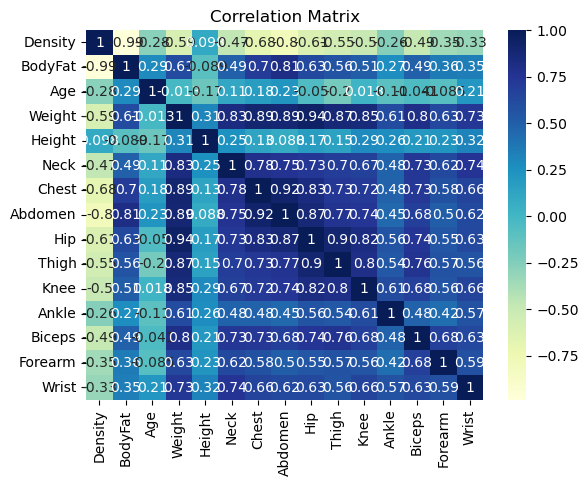

In [10]:
import seaborn as sns
corr = df.corr()
# Plot the heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()

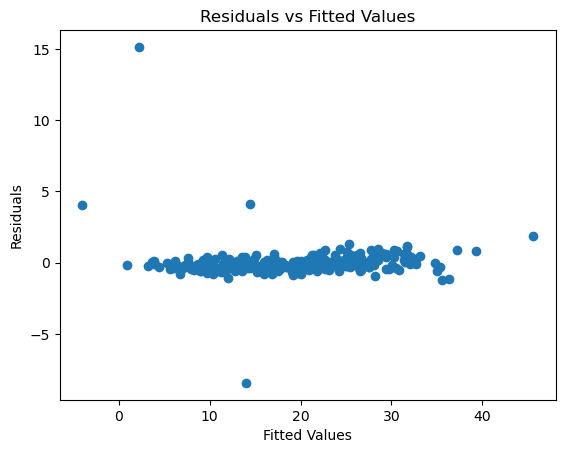

In [11]:

# Calculate the residuals
y_pred = reg.predict(df.drop("BodyFat", axis=1))
residuals = df["BodyFat"] - y_pred

# Plot the residuals against the fitted values
plt.scatter(y_pred, residuals)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

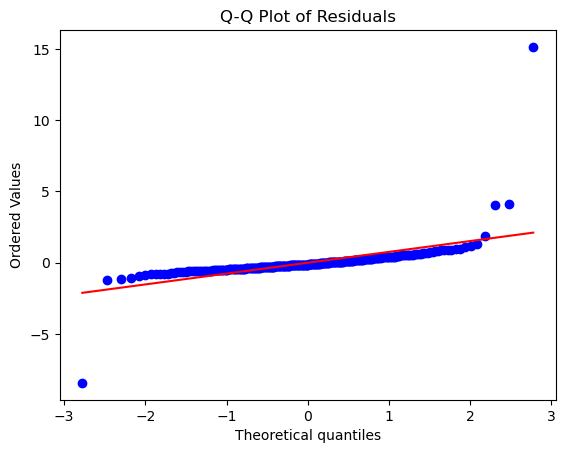

In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Calculate the residuals
y_pred = reg.predict(df.drop("BodyFat", axis=1))
residuals = df["BodyFat"] - y_pred

# Create a Q-Q plot of the residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()